# Module 11: Advanced Matplotlib and Publication Graphics

## 📊 Creating Professional Publication-Quality Visualizations

**Learning Objectives:**
- Master advanced matplotlib styling and customization techniques
- Create publication-ready figures with proper typography and layout
- Implement complex multi-panel layouts and subplot arrangements
- Generate vector graphics (SVG, PDF, EPS) for journals and presentations
- Apply consistent styling themes across multiple visualizations
- Optimize figures for different output formats and resolutions

**Topics Covered:**
1. **Advanced Styling** - Custom rcParams, themes, and style sheets
2. **Typography & Fonts** - Professional font selection and mathematical notation
3. **Complex Layouts** - GridSpec, nested subplots, and figure composition
4. **Publication Standards** - Journal formatting requirements and best practices
5. **Vector Graphics** - High-resolution outputs for print and digital media
6. **Custom Elements** - Annotations, insets, and advanced decorations

---

### Why Publication Graphics Matter

- **Research Impact**: High-quality figures increase citation rates and visibility
- **Professional Standards**: Journals have specific formatting requirements
- **Reproducibility**: Consistent styling ensures reliable visual communication
- **Accessibility**: Proper design makes research accessible to broader audiences

Let's elevate our matplotlib skills to publication standards! 🚀

In [1]:
# Essential libraries for advanced matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import gridspec, patches, patheffects
from matplotlib.patches import FancyBboxPatch, ConnectionPatch
from matplotlib.offsetbox import AnchoredText, OffsetImage, AnnotationBbox
import matplotlib.font_manager as fm
import matplotlib.ticker as ticker
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Data manipulation and analysis
import numpy as np
import pandas as pd
import scipy.stats as stats
from sklearn.datasets import make_classification, load_iris, load_wine
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Color theory (building on Module 10)
import seaborn as sns
from colorsys import hsv_to_rgb
import warnings
warnings.filterwarnings('ignore')

# Create publication-ready rcParams configuration
PUBLICATION_PARAMS = {
    # Figure settings
    'figure.figsize': [8, 6],
    'figure.dpi': 300,
    'figure.facecolor': 'white',
    'figure.edgecolor': 'none',
    
    # Font settings
    'font.family': 'DejaVu Sans',
    'font.size': 12,
    'font.weight': 'normal',
    
    # Axes settings
    'axes.titlesize': 14,
    'axes.titleweight': 'bold',
    'axes.labelsize': 12,
    'axes.labelweight': 'normal',
    'axes.linewidth': 1.0,
    'axes.spines.top': False,
    'axes.spines.right': False,
    'axes.grid': True,
    'axes.grid.axis': 'both',
    'axes.axisbelow': True,
    
    # Grid settings
    'grid.linewidth': 0.5,
    'grid.alpha': 0.3,
    'grid.color': 'gray',
    
    # Tick settings
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'xtick.direction': 'out',
    'ytick.direction': 'out',
    'xtick.major.size': 4,
    'ytick.major.size': 4,
    'xtick.minor.size': 2,
    'ytick.minor.size': 2,
    
    # Legend settings
    'legend.fontsize': 10,
    'legend.frameon': True,
    'legend.fancybox': False,
    'legend.edgecolor': 'black',
    'legend.facecolor': 'white',
    'legend.framealpha': 0.9,
    
    # Line and marker settings
    'lines.linewidth': 2.0,
    'lines.markersize': 6,
    'patch.linewidth': 0.5,
    
    # Saving settings
    'savefig.dpi': 300,
    'savefig.format': 'png',
    'savefig.bbox': 'tight',
    'savefig.pad_inches': 0.1,
    'savefig.facecolor': 'white',
    'savefig.edgecolor': 'none'
}

# Apply publication settings
plt.rcParams.update(PUBLICATION_PARAMS)

# Professional color palettes for publications
PUBLICATION_COLORS = {
    'nature': ['#E64B35', '#4DBBD5', '#00A087', '#3C5488', '#F39B7F', '#8491B4', '#91D1C2', '#DC0000'],
    'science': ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f'],
    'minimal': ['#2E3440', '#3B4252', '#434C5E', '#4C566A', '#5E81AC', '#81A1C1', '#88C0D0', '#8FBCBB'],
    'vibrant': ['#E63946', '#F77F00', '#FCBF49', '#06D6A0', '#118AB2', '#073B4C', '#8D5524', '#BC6C25']
}

print("📊 Advanced Matplotlib Setup Complete!")
print(f"✅ Publication DPI: {plt.rcParams['figure.dpi']}")
print(f"✅ Default figure size: {plt.rcParams['figure.figsize']}")
print(f"✅ Font family: {plt.rcParams['font.family']}")
print(f"✅ Available publication palettes: {list(PUBLICATION_COLORS.keys())}")
print("🎨 Ready for publication-quality visualizations!")

📊 Advanced Matplotlib Setup Complete!
✅ Publication DPI: 300.0
✅ Default figure size: [8.0, 6.0]
✅ Font family: ['DejaVu Sans']
✅ Available publication palettes: ['nature', 'science', 'minimal', 'vibrant']
🎨 Ready for publication-quality visualizations!


## 🏗️ Complex Layouts with GridSpec

Professional publications often require complex multi-panel layouts with different subplot sizes and arrangements. GridSpec provides precise control over subplot positioning and sizing.

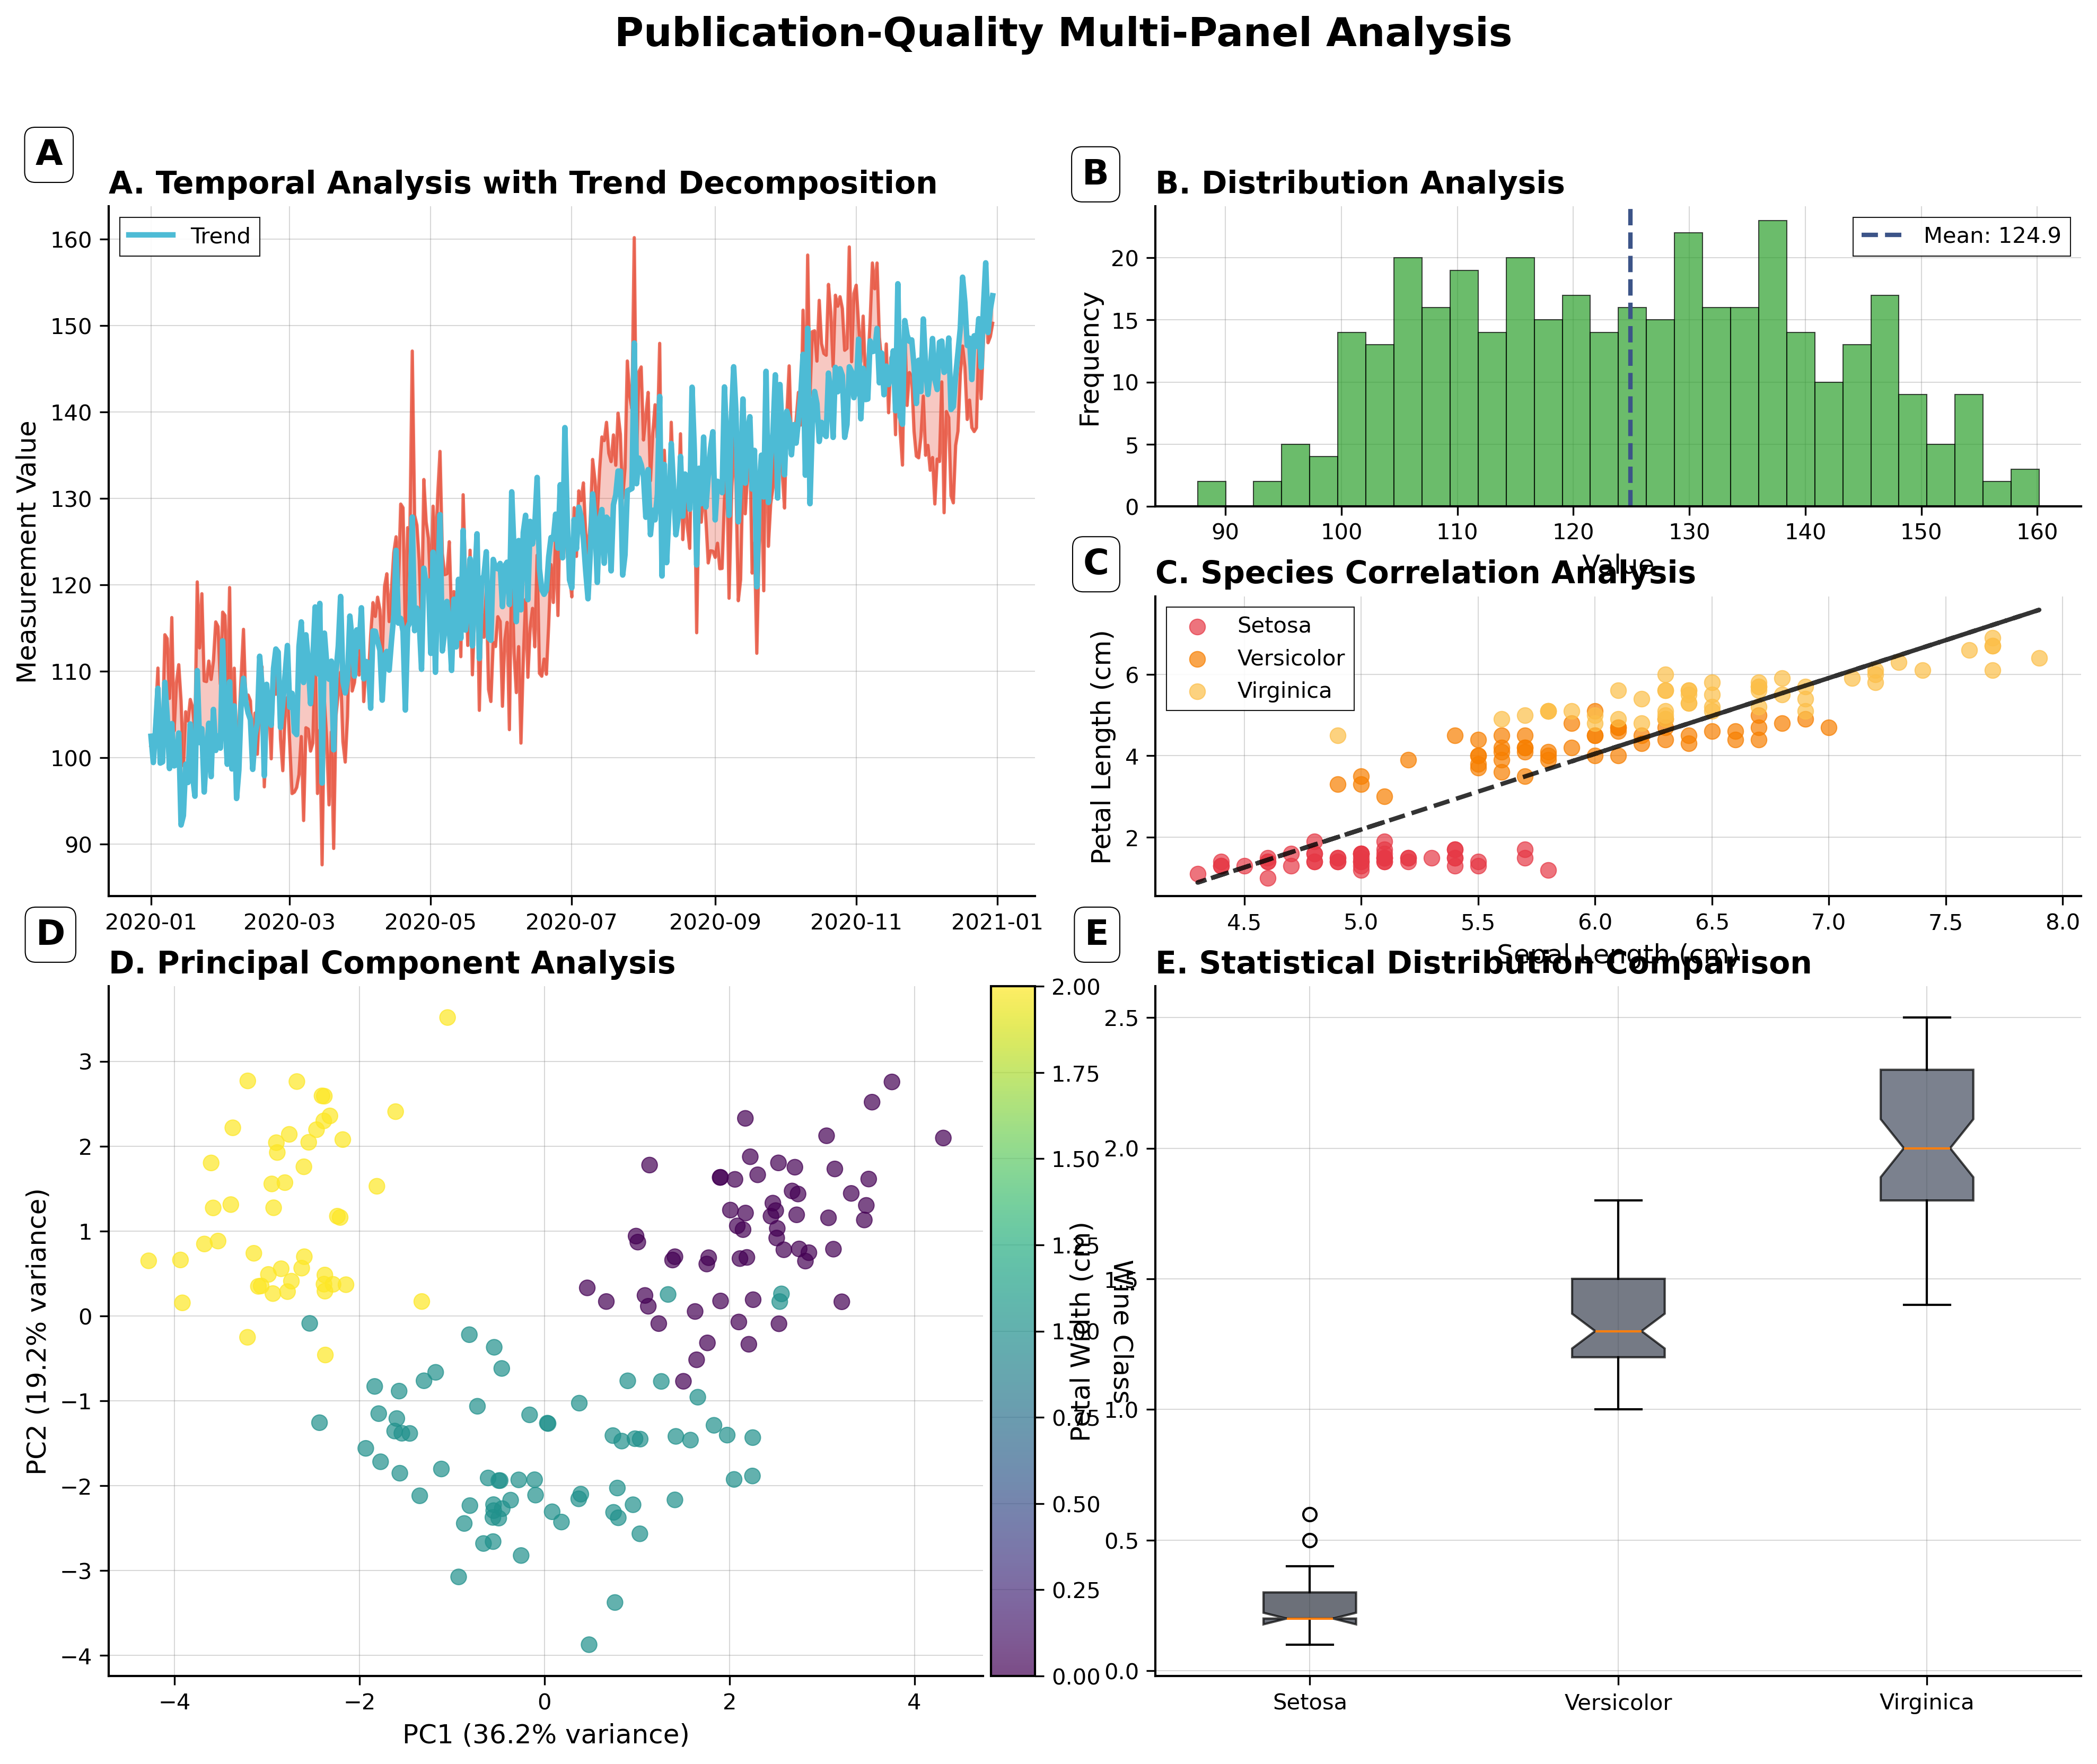

🎨 Complex Publication Layout Created!
✅ Multi-panel design with proper labeling
✅ Consistent color scheme across panels
✅ Professional typography and spacing
✅ Statistical annotations and legends


In [2]:
# Create sample datasets for publication figure
np.random.seed(42)

# Dataset 1: Time series with trend and seasonality
dates = pd.date_range('2020-01-01', periods=365, freq='D')
trend = np.linspace(100, 150, 365) + np.random.normal(0, 5, 365)
seasonal = 10 * np.sin(2 * np.pi * np.arange(365) / 365.25 * 4)
timeseries_data = trend + seasonal + np.random.normal(0, 3, 365)

# Dataset 2: Iris dataset for scatter plots
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target_names[iris.target]

# Dataset 3: Wine dataset for PCA
wine = load_wine()
wine_features = StandardScaler().fit_transform(wine.data)
pca = PCA(n_components=2)
wine_pca = pca.fit_transform(wine_features)

# Create a sophisticated publication-quality figure
fig = plt.figure(figsize=(16, 12))
gs = gridspec.GridSpec(4, 4, figure=fig, hspace=0.3, wspace=0.3)

# Panel A: Main time series plot (spans 2x2)
ax_main = fig.add_subplot(gs[0:2, 0:2])
ax_main.plot(dates, timeseries_data, color=PUBLICATION_COLORS['nature'][0], 
             linewidth=1.5, alpha=0.8)
ax_main.plot(dates, trend, color=PUBLICATION_COLORS['nature'][1], 
             linewidth=2.5, label='Trend')
ax_main.fill_between(dates, timeseries_data, trend, alpha=0.3, 
                     color=PUBLICATION_COLORS['nature'][0])
ax_main.set_title('A. Temporal Analysis with Trend Decomposition', 
                  fontsize=14, fontweight='bold', loc='left')
ax_main.set_ylabel('Measurement Value')
ax_main.legend(frameon=True, loc='upper left')
ax_main.grid(True, alpha=0.3)

# Panel B: Distribution histogram (top right)
ax_hist = fig.add_subplot(gs[0, 2:4])
ax_hist.hist(timeseries_data, bins=30, color=PUBLICATION_COLORS['science'][2], 
             alpha=0.7, edgecolor='black', linewidth=0.5)
ax_hist.axvline(np.mean(timeseries_data), color=PUBLICATION_COLORS['nature'][3], 
                linestyle='--', linewidth=2, label=f'Mean: {np.mean(timeseries_data):.1f}')
ax_hist.set_title('B. Distribution Analysis', fontsize=14, fontweight='bold', loc='left')
ax_hist.set_xlabel('Value')
ax_hist.set_ylabel('Frequency')
ax_hist.legend()

# Panel C: Scatter plot with regression (middle right)
ax_scatter = fig.add_subplot(gs[1, 2:4])
for i, species in enumerate(iris_df['species'].unique()):
    data = iris_df[iris_df['species'] == species]
    ax_scatter.scatter(data['sepal length (cm)'], data['petal length (cm)'], 
                      color=PUBLICATION_COLORS['vibrant'][i], 
                      label=species.capitalize(), alpha=0.7, s=50)

# Add regression line
x = iris_df['sepal length (cm)']
y = iris_df['petal length (cm)']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
ax_scatter.plot(x, p(x), color='black', linestyle='--', alpha=0.8)
ax_scatter.set_title('C. Species Correlation Analysis', fontsize=14, fontweight='bold', loc='left')
ax_scatter.set_xlabel('Sepal Length (cm)')
ax_scatter.set_ylabel('Petal Length (cm)')
ax_scatter.legend(frameon=True, loc='upper left')

# Panel D: PCA biplot (bottom left, spans 2 columns)
ax_pca = fig.add_subplot(gs[2:4, 0:2])
scatter = ax_pca.scatter(wine_pca[:, 0], wine_pca[:, 1], 
                        c=wine.target, cmap='viridis', alpha=0.7, s=50)
ax_pca.set_title('D. Principal Component Analysis', fontsize=14, fontweight='bold', loc='left')
ax_pca.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)')
ax_pca.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)')

# Add colorbar for PCA
divider = make_axes_locatable(ax_pca)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(scatter, cax=cax)
cbar.set_label('Wine Class', rotation=270, labelpad=15)

# Panel E: Box plot comparison (bottom right)
ax_box = fig.add_subplot(gs[2:4, 2:4])
box_data = [iris_df[iris_df['species'] == species]['petal width (cm)'] 
            for species in iris_df['species'].unique()]
bp = ax_box.boxplot(box_data, labels=[s.capitalize() for s in iris_df['species'].unique()],
                    patch_artist=True, notch=True)

# Customize box plot colors
for patch, color in zip(bp['boxes'], PUBLICATION_COLORS['minimal'][:3]):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax_box.set_title('E. Statistical Distribution Comparison', fontsize=14, fontweight='bold', loc='left')
ax_box.set_ylabel('Petal Width (cm)')
ax_box.grid(True, alpha=0.3)

# Add overall figure title
fig.suptitle('Publication-Quality Multi-Panel Analysis', 
             fontsize=18, fontweight='bold', y=0.98)

# Add panel labels with custom styling
panel_labels = ['A', 'B', 'C', 'D', 'E']
axes = [ax_main, ax_hist, ax_scatter, ax_pca, ax_box]

for label, ax in zip(panel_labels, axes):
    # Add panel label in top-left corner
    ax.text(-0.05, 1.05, label, transform=ax.transAxes, 
            fontsize=16, fontweight='bold', va='bottom', ha='right',
            bbox=dict(boxstyle="round,pad=0.3", facecolor='white', edgecolor='black'))

plt.tight_layout()
plt.show()

print("🎨 Complex Publication Layout Created!")
print("✅ Multi-panel design with proper labeling")
print("✅ Consistent color scheme across panels") 
print("✅ Professional typography and spacing")
print("✅ Statistical annotations and legends")

## 📝 Advanced Typography and Mathematical Notation

Professional publications require precise typography, mathematical formulas, and scientific notation. Matplotlib supports LaTeX rendering for beautiful mathematical expressions.

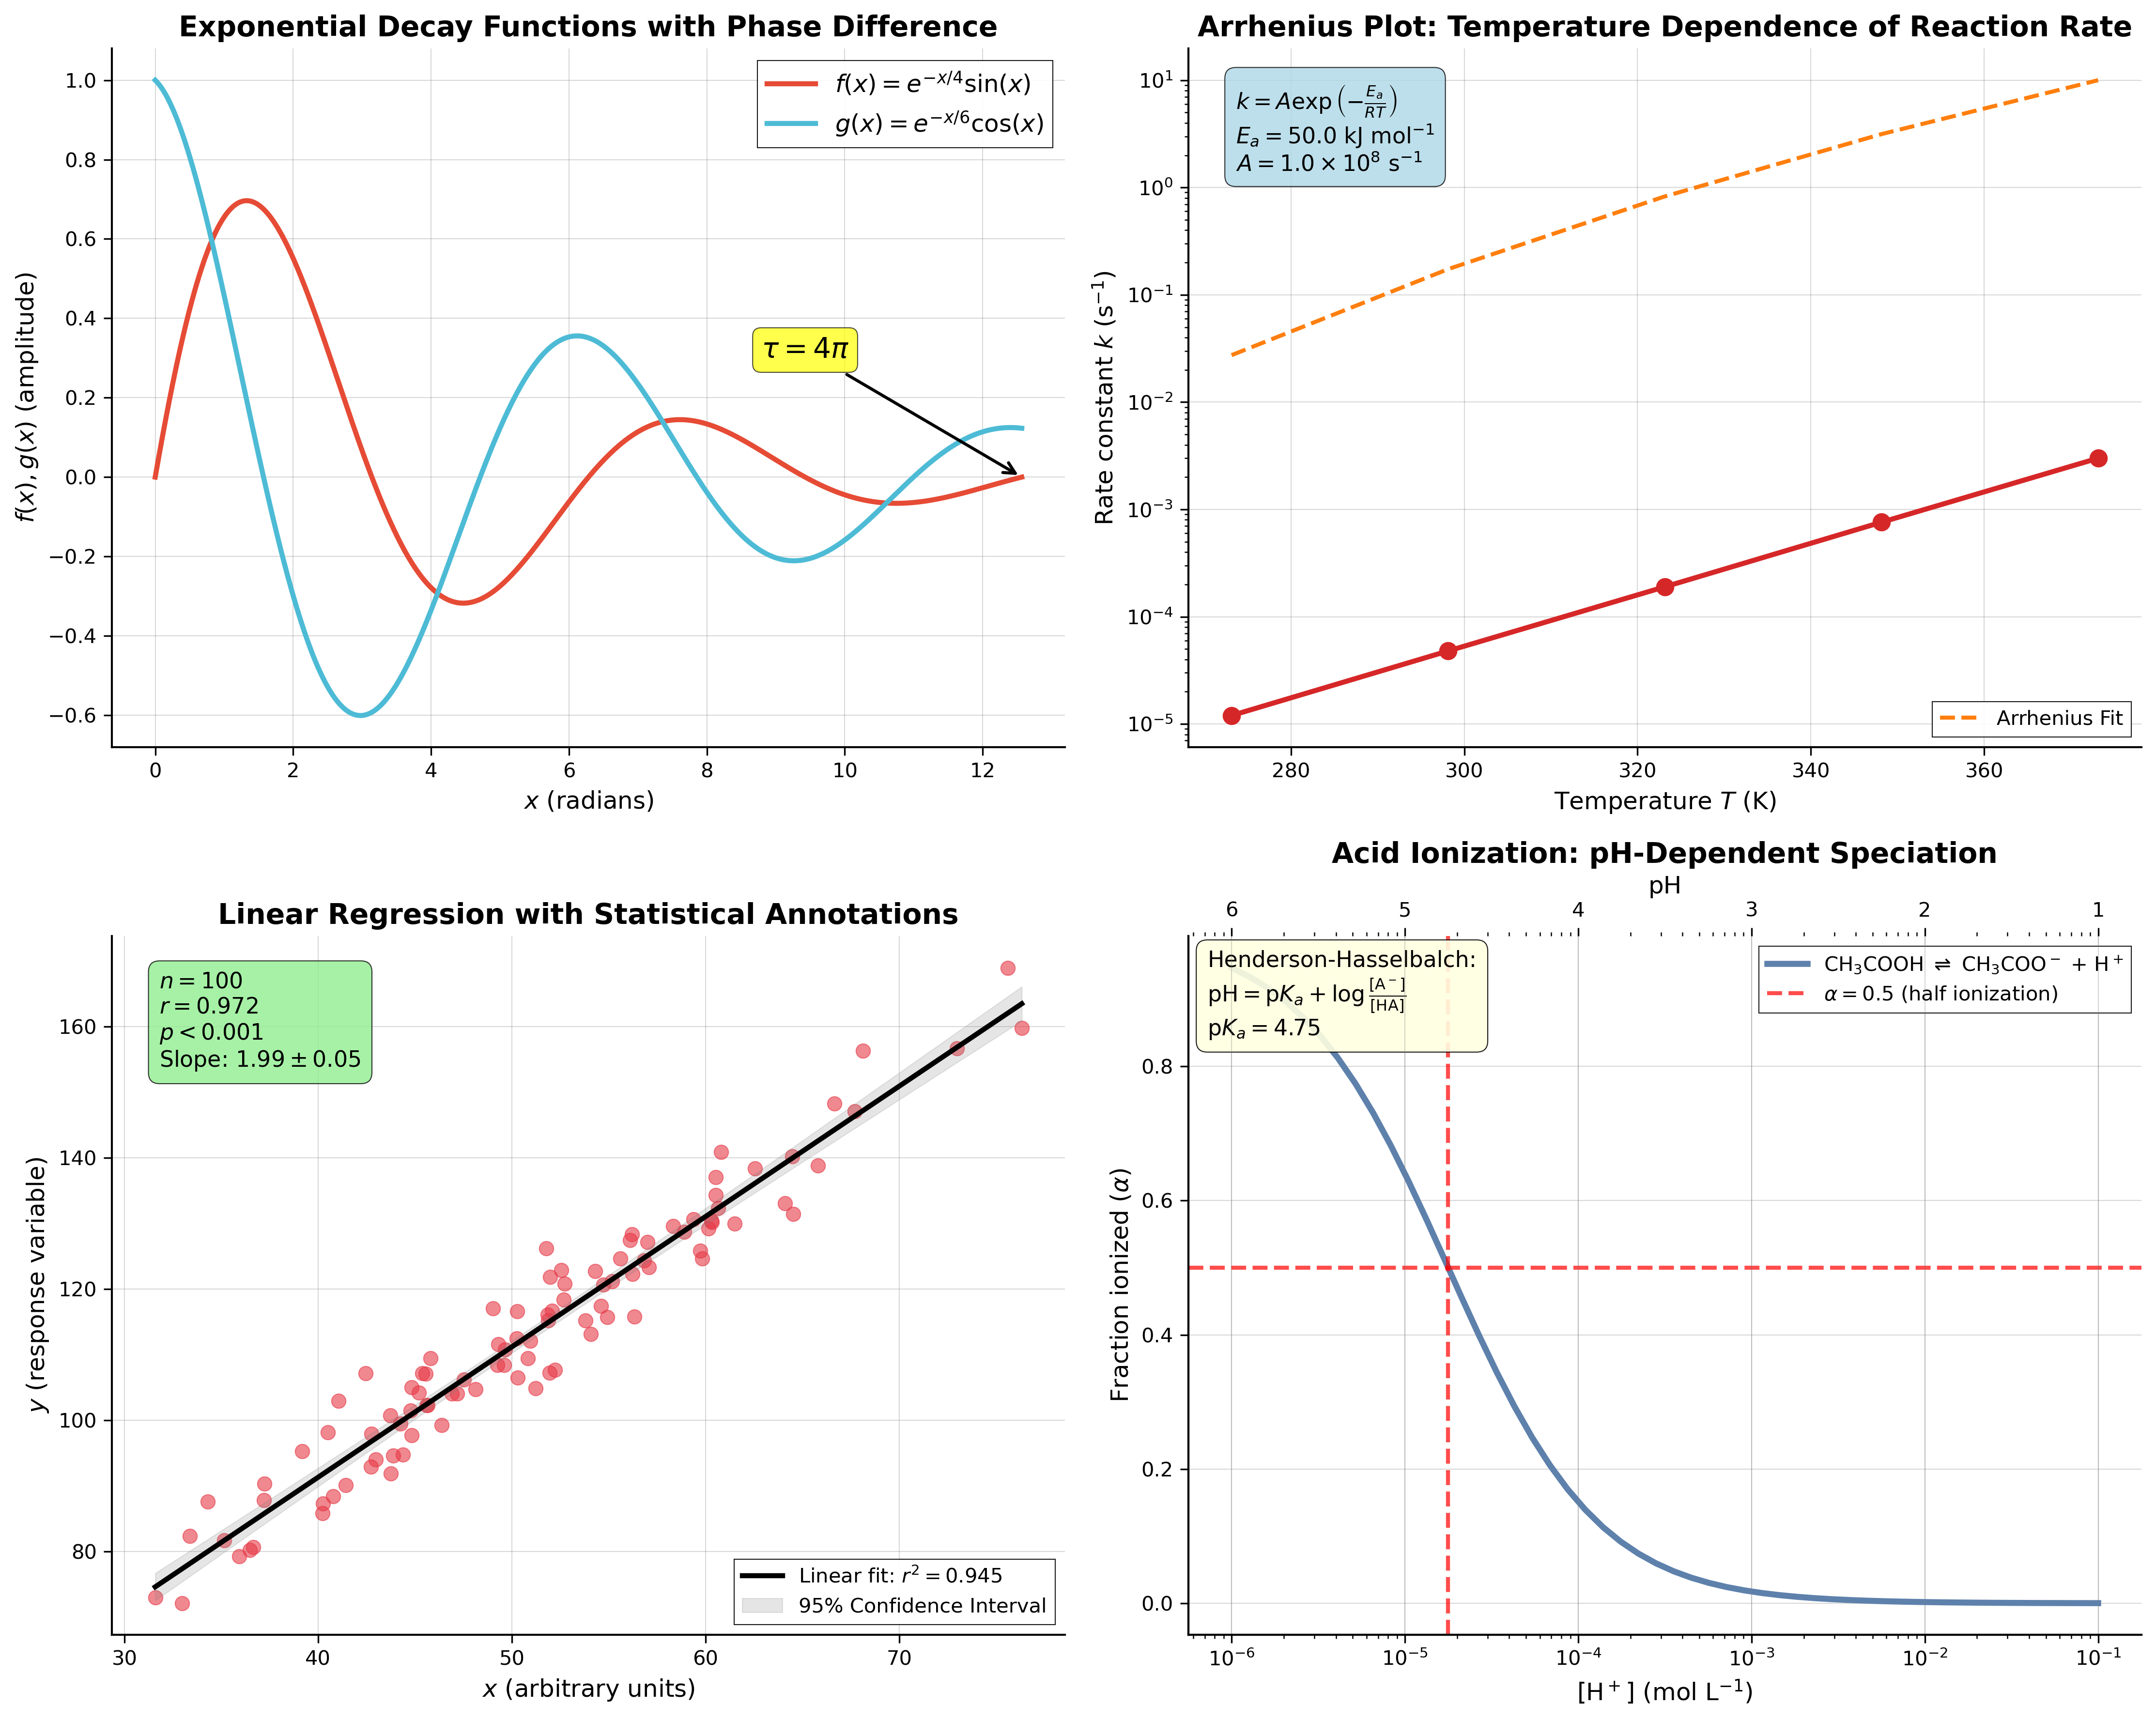

📝 Advanced Typography Examples Created!
✅ Mathematical equations with LaTeX rendering
✅ Scientific notation and units
✅ Statistical annotations and confidence intervals
✅ Chemical formulas and equilibrium expressions
✅ Multi-axis plots with proper labeling


In [3]:
# Create scientific data for typography examples
x = np.linspace(0, 4*np.pi, 1000)
y1 = np.exp(-x/4) * np.sin(x)
y2 = np.exp(-x/6) * np.cos(x)

# Create figure with advanced typography examples
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Panel 1: Mathematical equations and Greek letters
ax1.plot(x, y1, color=PUBLICATION_COLORS['nature'][0], linewidth=2.5, 
         label=r'$f(x) = e^{-x/4} \sin(x)$')
ax1.plot(x, y2, color=PUBLICATION_COLORS['nature'][1], linewidth=2.5,
         label=r'$g(x) = e^{-x/6} \cos(x)$')

ax1.set_title(r'Exponential Decay Functions with Phase Difference', 
              fontsize=14, fontweight='bold')
ax1.set_xlabel(r'$x$ (radians)', fontsize=12)
ax1.set_ylabel(r'$f(x), g(x)$ (amplitude)', fontsize=12)

# Add mathematical annotation
ax1.annotate(r'$\tau = 4\pi$', xy=(4*np.pi, 0), xytext=(3*np.pi, 0.3),
            arrowprops=dict(arrowstyle='->', color='black', lw=1.5),
            fontsize=14, ha='center',
            bbox=dict(boxstyle="round,pad=0.3", facecolor='yellow', alpha=0.7))

ax1.legend(fontsize=12, loc='upper right')
ax1.grid(True, alpha=0.3)

# Panel 2: Scientific notation and units
temps = np.array([273.15, 298.15, 323.15, 348.15, 373.15])  # Kelvin
rates = np.array([1.2e-5, 4.8e-5, 1.9e-4, 7.6e-4, 3.0e-3])  # reaction rates

ax2.semilogy(temps, rates, 'o-', color=PUBLICATION_COLORS['science'][3], 
             linewidth=2.5, markersize=8)

# Arrhenius equation fit
A = 1e8  # pre-exponential factor
Ea = 50000  # activation energy (J/mol)
R = 8.314  # gas constant
fit_rates = A * np.exp(-Ea/(R*temps))
ax2.semilogy(temps, fit_rates, '--', color=PUBLICATION_COLORS['science'][1], 
             linewidth=2, label='Arrhenius Fit')

ax2.set_title('Arrhenius Plot: Temperature Dependence of Reaction Rate', 
              fontsize=14, fontweight='bold')
ax2.set_xlabel(r'Temperature $T$ (K)', fontsize=12)
ax2.set_ylabel(r'Rate constant $k$ (s$^{-1}$)', fontsize=12)

# Add equation box
equation_text = (r'$k = A \exp\left(-\frac{E_a}{RT}\right)$' + '\n' +
                r'$E_a = 50.0$ kJ mol$^{-1}$' + '\n' +
                r'$A = 1.0 \times 10^8$ s$^{-1}$')
ax2.text(0.05, 0.95, equation_text, transform=ax2.transAxes, fontsize=11,
         verticalalignment='top', bbox=dict(boxstyle="round,pad=0.5", 
         facecolor='lightblue', alpha=0.8))

ax2.legend()
ax2.grid(True, alpha=0.3)

# Panel 3: Statistical annotations with confidence intervals
n_samples = 100
x_data = np.random.normal(50, 10, n_samples)
y_data = 2*x_data + np.random.normal(0, 5, n_samples) + 10

ax3.scatter(x_data, y_data, color=PUBLICATION_COLORS['vibrant'][0], 
           alpha=0.6, s=50)

# Linear regression with confidence interval
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(x_data, y_data)
line_x = np.linspace(x_data.min(), x_data.max(), 100)
line_y = slope * line_x + intercept

ax3.plot(line_x, line_y, color='black', linewidth=2.5, 
         label=f'Linear fit: $r^2 = {r_value**2:.3f}$')

# Calculate and plot confidence interval
def prediction_interval(x, y, newx, confidence=0.95):
    n = len(x)
    mean_x = np.mean(x)
    sxx = np.sum((x - mean_x)**2)
    sxy = np.sum((x - mean_x) * (y - np.mean(y)))
    syy = np.sum((y - np.mean(y))**2)
    s = np.sqrt((syy - sxy**2/sxx) / (n-2))
    t = stats.t.ppf((1 + confidence)/2, n-2)
    margin = t * s * np.sqrt(1/n + (newx - mean_x)**2/sxx)
    return margin

margins = prediction_interval(x_data, y_data, line_x)
ax3.fill_between(line_x, line_y - margins, line_y + margins, 
                alpha=0.2, color='gray', label='95% Confidence Interval')

ax3.set_title('Linear Regression with Statistical Annotations', 
              fontsize=14, fontweight='bold')
ax3.set_xlabel(r'$x$ (arbitrary units)', fontsize=12)
ax3.set_ylabel(r'$y$ (response variable)', fontsize=12)

# Add statistical summary
stats_text = (f'$n = {n_samples}$\n'
              f'$r = {r_value:.3f}$\n'
              f'$p < 0.001$\n'
              f'Slope: ${slope:.2f} \pm {std_err:.2f}$')
ax3.text(0.05, 0.95, stats_text, transform=ax3.transAxes, fontsize=11,
         verticalalignment='top', bbox=dict(boxstyle="round,pad=0.5", 
         facecolor='lightgreen', alpha=0.8))

ax3.legend()
ax3.grid(True, alpha=0.3)

# Panel 4: Complex chemical/physical notation
concentrations = np.logspace(-6, -1, 50)  # Molar concentrations
pH = -np.log10(concentrations)
fraction_ionized = 1 / (1 + 10**(4.75 - pH))  # acetic acid ionization

ax4.semilogx(concentrations, fraction_ionized, color=PUBLICATION_COLORS['minimal'][4], 
            linewidth=3, label=r'CH$_3$COOH $\rightleftharpoons$ CH$_3$COO$^-$ + H$^+$')

ax4.axhline(y=0.5, color='red', linestyle='--', alpha=0.7, 
           label=r'$\alpha = 0.5$ (half ionization)')
ax4.axvline(x=10**-4.75, color='red', linestyle='--', alpha=0.7)

ax4.set_title('Acid Ionization: pH-Dependent Speciation', 
              fontsize=14, fontweight='bold')
ax4.set_xlabel(r'[H$^+$] (mol L$^{-1}$)', fontsize=12)
ax4.set_ylabel(r'Fraction ionized ($\alpha$)', fontsize=12)

# Add Henderson-Hasselbalch equation
hh_text = (r'Henderson-Hasselbalch:' + '\n' +
           r'$\mathrm{pH} = \mathrm{p}K_a + \log\frac{[\mathrm{A}^-]}{[\mathrm{HA}]}$' + '\n' +
           r'$\mathrm{p}K_a = 4.75$')
ax4.text(0.02, 0.98, hh_text, transform=ax4.transAxes, fontsize=11,
         verticalalignment='top', bbox=dict(boxstyle="round,pad=0.5", 
         facecolor='lightyellow', alpha=0.9))

# Add secondary x-axis for pH
ax4_top = ax4.twiny()
ax4_top.set_xlim(ax4.get_xlim())
ax4_top.set_xscale('log')
ph_ticks = [1, 2, 3, 4, 5, 6]
h_ticks = [10**(-ph) for ph in ph_ticks]
ax4_top.set_xticks(h_ticks)
ax4_top.set_xticklabels([f'{ph}' for ph in ph_ticks])
ax4_top.set_xlabel('pH', fontsize=12)

ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("📝 Advanced Typography Examples Created!")
print("✅ Mathematical equations with LaTeX rendering")
print("✅ Scientific notation and units")
print("✅ Statistical annotations and confidence intervals")
print("✅ Chemical formulas and equilibrium expressions")
print("✅ Multi-axis plots with proper labeling")

## 🎯 Vector Graphics and Publication Export

Professional publications require high-quality vector graphics that scale perfectly at any resolution. Let's explore different export formats and their use cases.

🎯 Exporting Publication Figure in Multiple Formats:
✅ PNG_Screen   → publication_example_png_screen.png (265.5 KB)
✅ PNG_Screen   → publication_example_png_screen.png (265.5 KB)
✅ PNG_Print    → publication_example_png_print.png (592.6 KB)
✅ PNG_Print    → publication_example_png_print.png (592.6 KB)
✅ PDF_Vector   → publication_example_pdf_vector.pdf (47.7 KB)
✅ PDF_Vector   → publication_example_pdf_vector.pdf (47.7 KB)
✅ SVG_Web      → publication_example_svg_web.svg (138.7 KB)
✅ SVG_Web      → publication_example_svg_web.svg (138.7 KB)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


✅ EPS_Journal  → publication_example_eps_journal.eps (9934.8 KB)
✅ TIFF_Archive → publication_example_tiff_archive.tiff (163581.7 KB)
✅ TIFF_Archive → publication_example_tiff_archive.tiff (163581.7 KB)


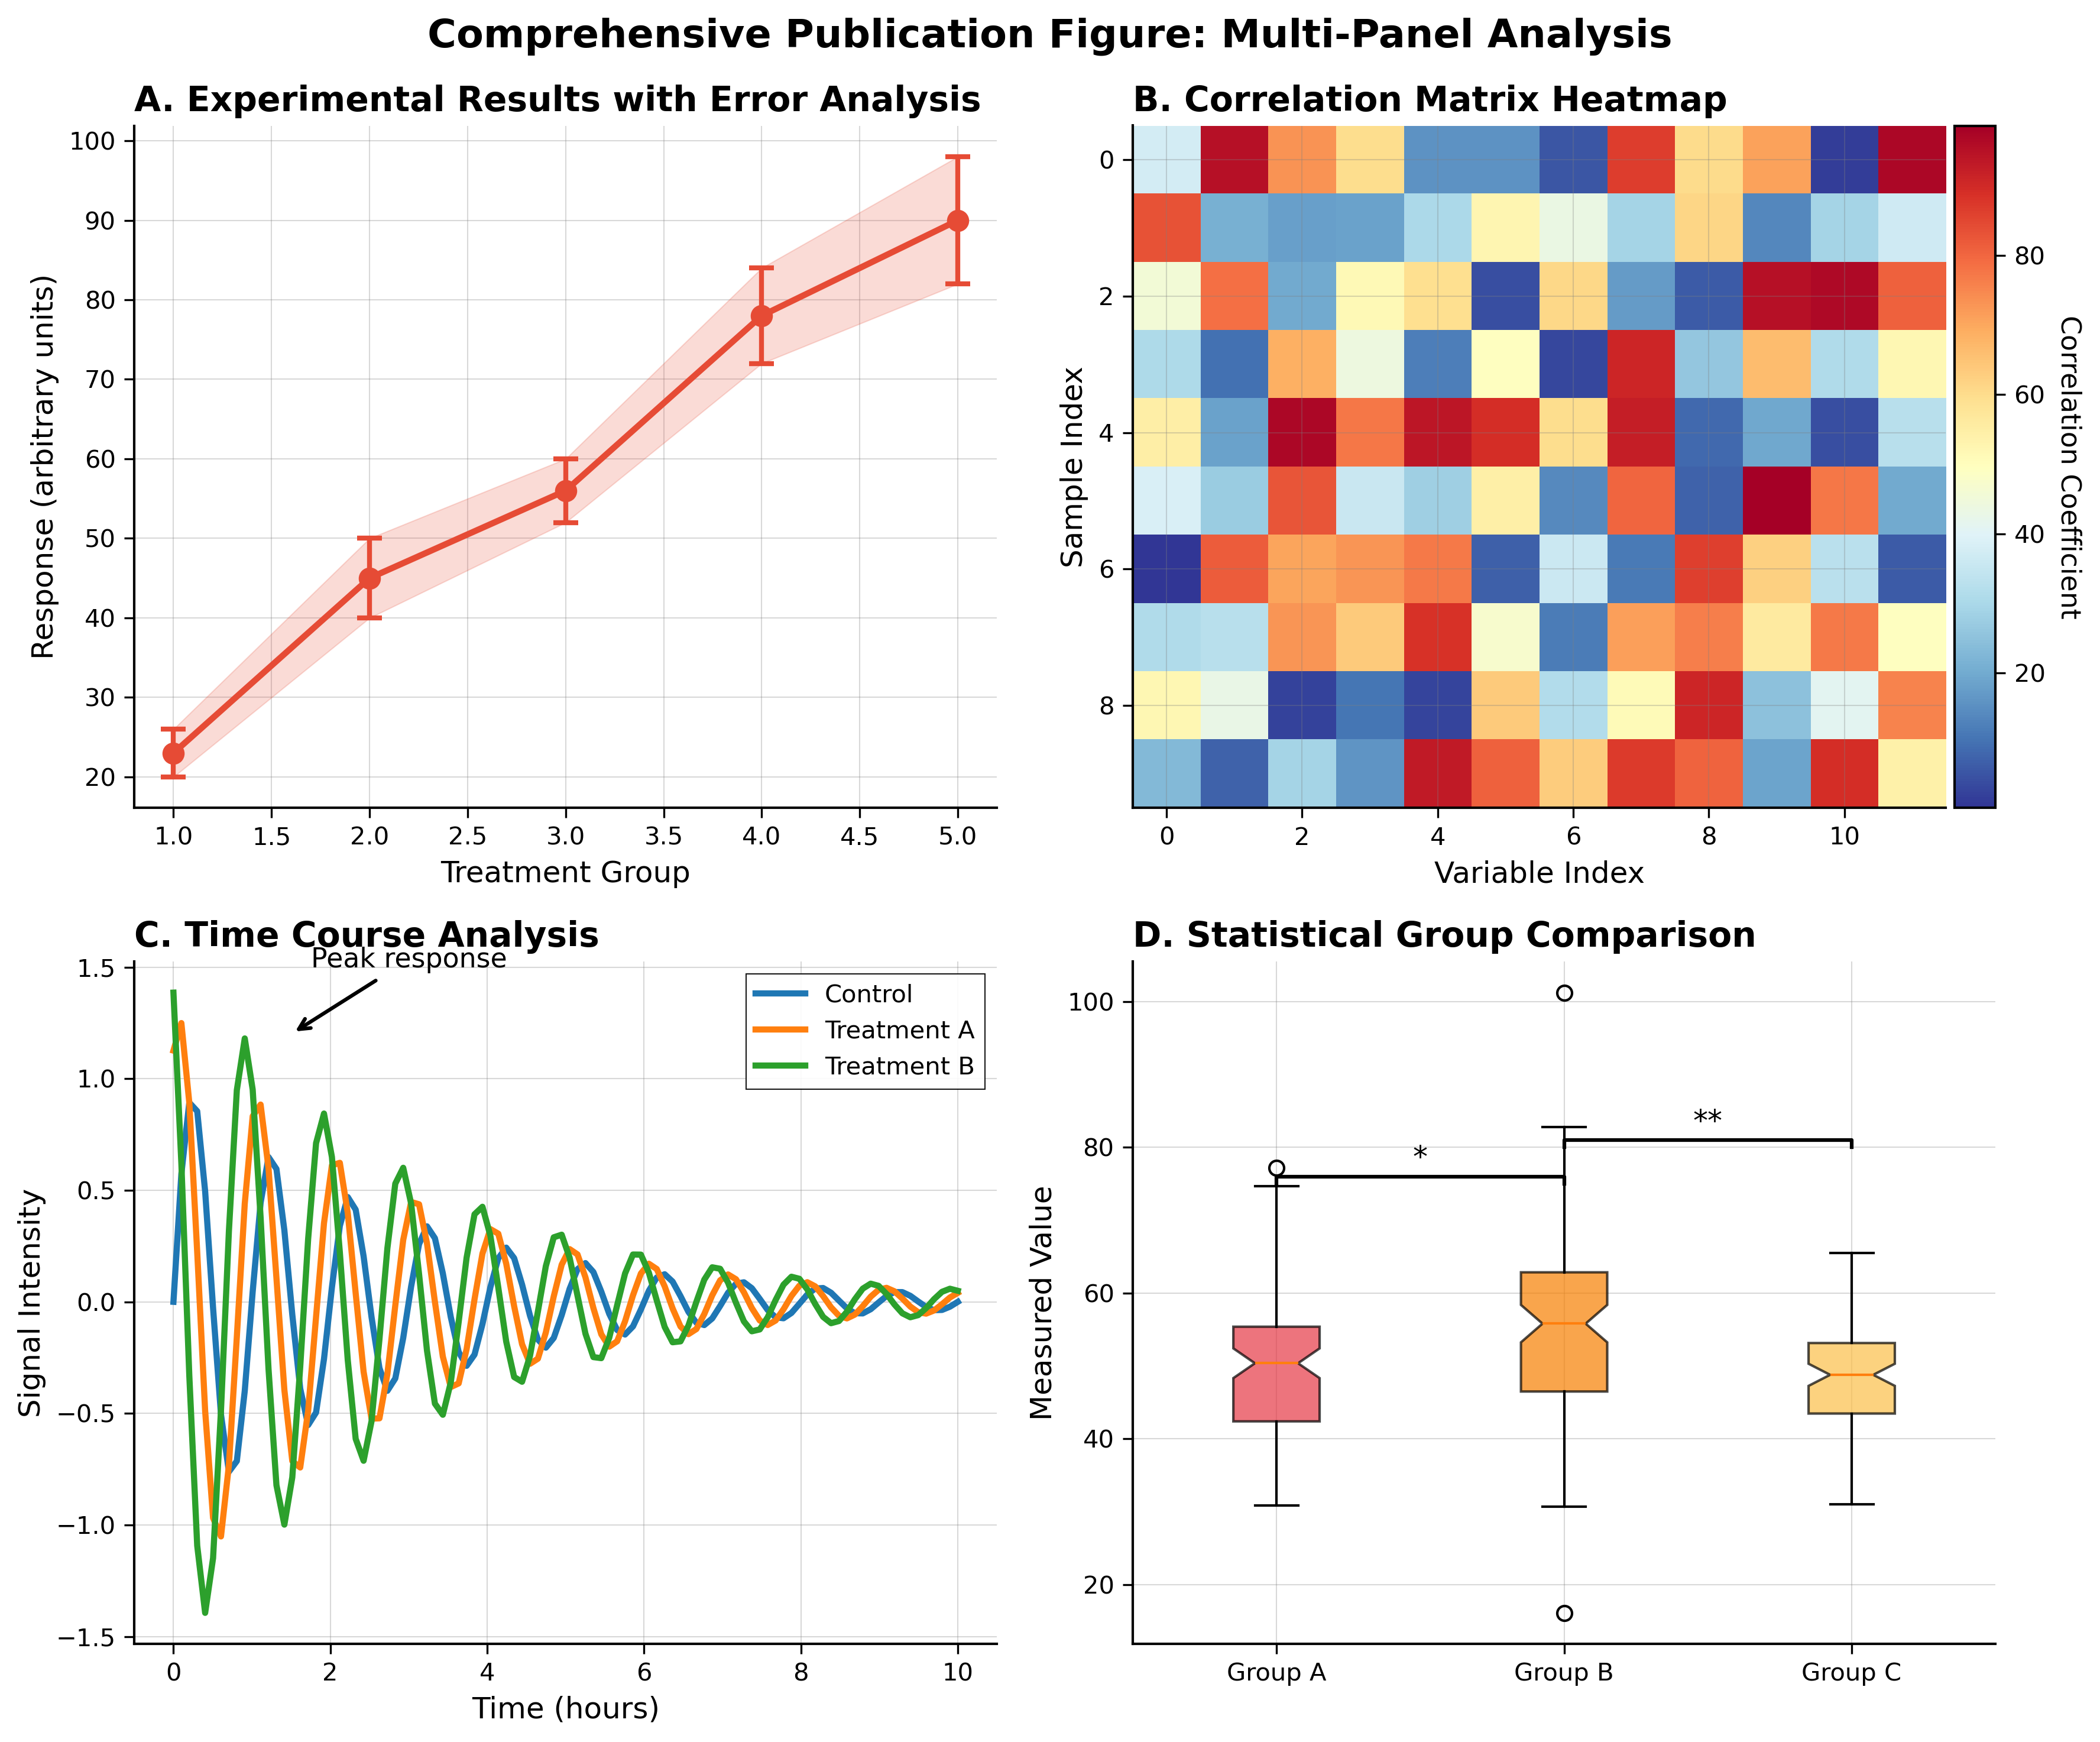


📋 Publication Format Guide:

🖥️  PNG_Screen (150 DPI)    → Presentations, web displays, quick sharing
🖨️  PNG_Print (300 DPI)     → High-quality prints, posters, reports  
📄 PDF_Vector               → Journals, LaTeX documents, scalable prints
🌐 SVG_Web                  → Web publications, interactive displays
📰 EPS_Journal              → Traditional journal submissions (required by some)
🗄️  TIFF_Archive (600 DPI)  → Long-term archival, highest quality preservation

💡 Pro Tips:
   • Use vector formats (PDF, SVG, EPS) for scalable graphics
   • PNG at 300+ DPI for raster requirements
   • Always use 'bbox_inches=tight' to avoid whitespace
   • Set consistent DPI across related figures

\n🎨 Style Sheet Examples:
✅ Available matplotlib styles: 29
✅ Demonstrated styles: ['seaborn-v0_8', 'ggplot', 'classic']


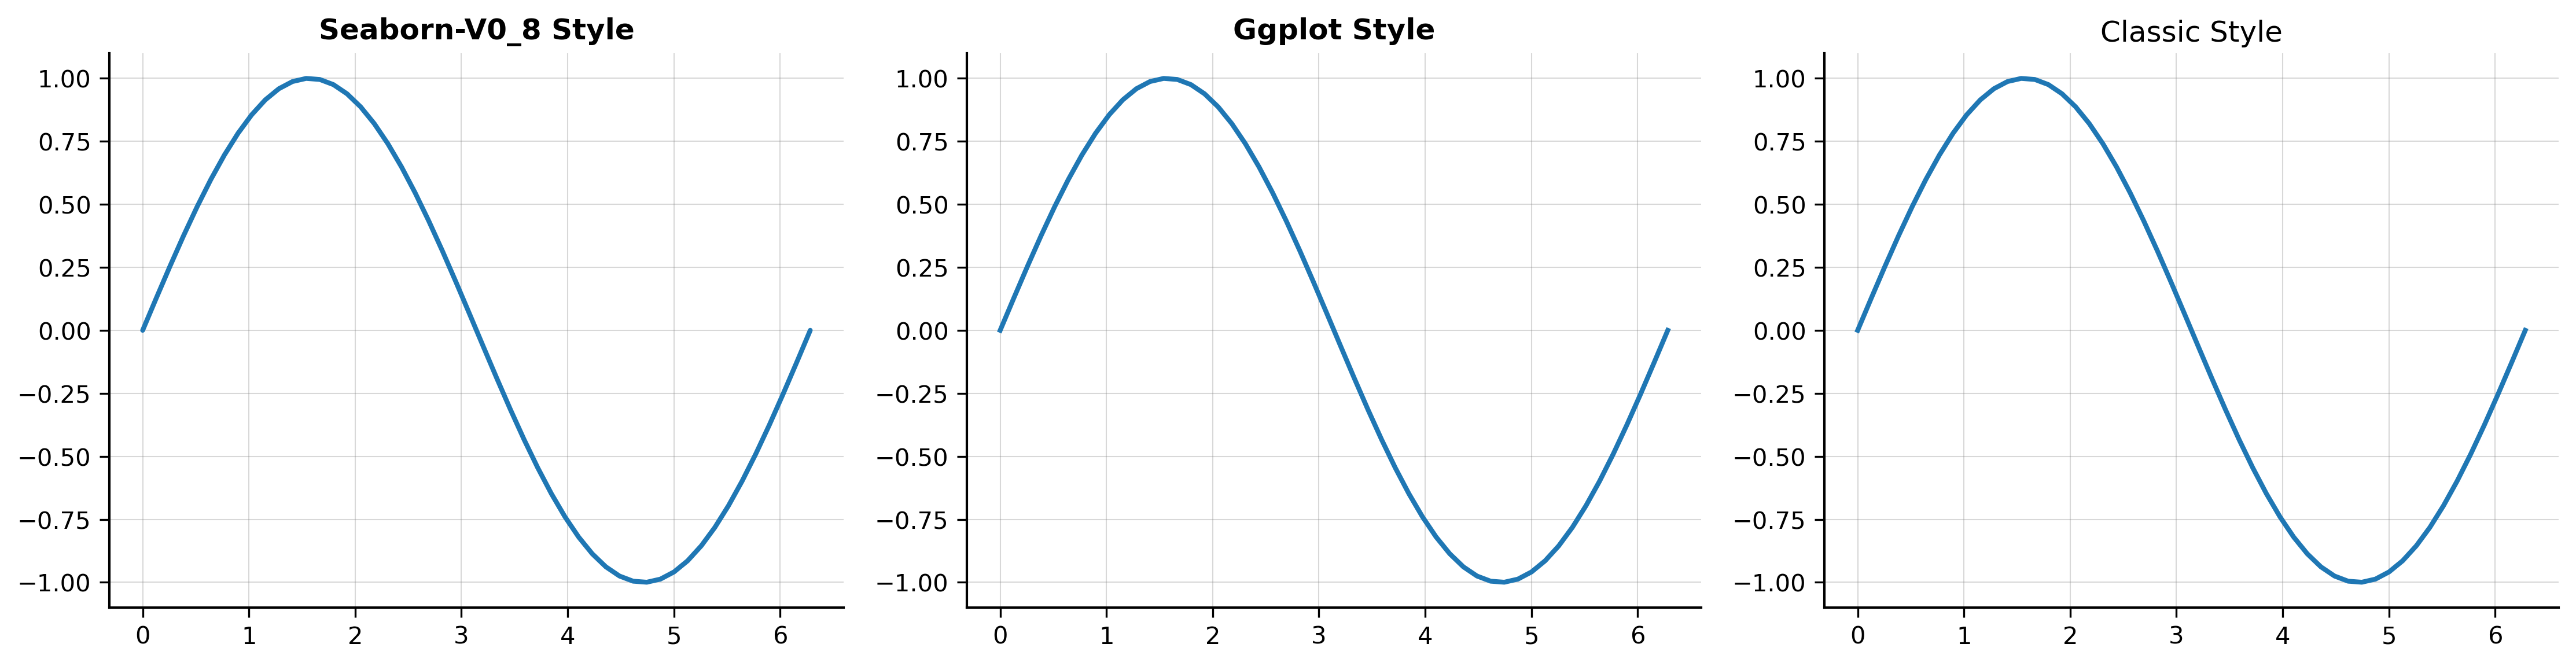

In [5]:
# Create outputs directory if it doesn't exist
import os
os.makedirs('/Users/sanjeevadodlapati/Downloads/Repos/DataVisualization-Comprehensive-Tutorial/outputs/figures', exist_ok=True)

# Create a publication-quality figure for export demonstration
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))

# Panel A: High-quality scatter plot with error bars
np.random.seed(42)
x_vals = np.arange(1, 6)
y_vals = [23, 45, 56, 78, 90]
y_errors = [3, 5, 4, 6, 8]

ax1.errorbar(x_vals, y_vals, yerr=y_errors, fmt='o-', 
             color=PUBLICATION_COLORS['nature'][0], linewidth=2.5, 
             markersize=8, capsize=5, capthick=2, elinewidth=2)
ax1.fill_between(x_vals, np.array(y_vals) - np.array(y_errors), 
                 np.array(y_vals) + np.array(y_errors), 
                 alpha=0.2, color=PUBLICATION_COLORS['nature'][0])

ax1.set_title('A. Experimental Results with Error Analysis', 
              fontsize=14, fontweight='bold', loc='left')
ax1.set_xlabel('Treatment Group', fontsize=12)
ax1.set_ylabel('Response (arbitrary units)', fontsize=12)
ax1.grid(True, alpha=0.3)

# Panel B: Heatmap with custom colorbar
data_matrix = np.random.rand(10, 12) * 100
im = ax2.imshow(data_matrix, cmap='RdYlBu_r', aspect='auto', interpolation='nearest')
ax2.set_title('B. Correlation Matrix Heatmap', fontsize=14, fontweight='bold', loc='left')
ax2.set_xlabel('Variable Index', fontsize=12)
ax2.set_ylabel('Sample Index', fontsize=12)

# Add custom colorbar
divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(im, cax=cax)
cbar.set_label('Correlation Coefficient', rotation=270, labelpad=15, fontsize=11)

# Panel C: Multi-line plot with annotations
t = np.linspace(0, 10, 100)
for i, (label, color) in enumerate(zip(['Control', 'Treatment A', 'Treatment B'], 
                                      PUBLICATION_COLORS['science'][:3])):
    y = np.exp(-t/3) * np.sin(2*np.pi*t + i*np.pi/3) * (1 + i*0.3)
    ax3.plot(t, y, label=label, color=color, linewidth=2.5)

ax3.set_title('C. Time Course Analysis', fontsize=14, fontweight='bold', loc='left')
ax3.set_xlabel('Time (hours)', fontsize=12)
ax3.set_ylabel('Signal Intensity', fontsize=12)
ax3.legend(frameon=True, loc='upper right', fontsize=10)
ax3.grid(True, alpha=0.3)

# Add annotation arrow
ax3.annotate('Peak response', xy=(1.5, 1.2), xytext=(3, 1.5),
            arrowprops=dict(arrowstyle='->', color='black', lw=1.5),
            fontsize=11, ha='center')

# Panel D: Box plot with statistical annotations
data_groups = [np.random.normal(50, 10, 100), 
               np.random.normal(55, 12, 100), 
               np.random.normal(48, 8, 100)]
bp = ax4.boxplot(data_groups, labels=['Group A', 'Group B', 'Group C'],
                patch_artist=True, notch=True)

# Customize box plot appearance
for patch, color in zip(bp['boxes'], PUBLICATION_COLORS['vibrant'][:3]):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

# Add statistical significance indicators
def add_significance_bar(ax, x1, x2, y, p_value):
    """Add significance bar between two groups"""
    ax.plot([x1, x1, x2, x2], [y, y+1, y+1, y], 'k-', linewidth=1.5)
    if p_value < 0.001:
        sig_text = '***'
    elif p_value < 0.01:
        sig_text = '**'
    elif p_value < 0.05:
        sig_text = '*'
    else:
        sig_text = 'ns'
    ax.text((x1+x2)/2, y+1.5, sig_text, ha='center', va='bottom', fontsize=12)

add_significance_bar(ax4, 1, 2, 75, 0.03)  # A vs B
add_significance_bar(ax4, 2, 3, 80, 0.001)  # B vs C

ax4.set_title('D. Statistical Group Comparison', fontsize=14, fontweight='bold', loc='left')
ax4.set_ylabel('Measured Value', fontsize=12)
ax4.grid(True, alpha=0.3)

# Add figure-wide title and adjust layout
fig.suptitle('Comprehensive Publication Figure: Multi-Panel Analysis', 
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()

# Export in multiple formats with different settings
base_path = '/Users/sanjeevadodlapati/Downloads/Repos/DataVisualization-Comprehensive-Tutorial/outputs/figures/'
figure_name = 'publication_example'

# Format specifications for different use cases
export_formats = {
    'PNG_Screen': {'format': 'png', 'dpi': 150, 'bbox_inches': 'tight'},
    'PNG_Print': {'format': 'png', 'dpi': 300, 'bbox_inches': 'tight'},
    'PDF_Vector': {'format': 'pdf', 'bbox_inches': 'tight'},
    'SVG_Web': {'format': 'svg', 'bbox_inches': 'tight'},
    'EPS_Journal': {'format': 'eps', 'bbox_inches': 'tight'},
    'TIFF_Archive': {'format': 'tiff', 'dpi': 600, 'bbox_inches': 'tight'}
}

print("🎯 Exporting Publication Figure in Multiple Formats:")
print("=" * 50)

for format_name, settings in export_formats.items():
    filename = f"{base_path}{figure_name}_{format_name.lower()}.{settings['format']}"
    try:
        plt.savefig(filename, **settings)
        file_size = os.path.getsize(filename) / 1024  # KB
        print(f"✅ {format_name:<12} → {filename.split('/')[-1]:<30} ({file_size:.1f} KB)")
    except Exception as e:
        print(f"❌ {format_name:<12} → Error: {str(e)}")

plt.show()

# Display export format recommendations
format_guide = """
📋 Publication Format Guide:

🖥️  PNG_Screen (150 DPI)    → Presentations, web displays, quick sharing
🖨️  PNG_Print (300 DPI)     → High-quality prints, posters, reports  
📄 PDF_Vector               → Journals, LaTeX documents, scalable prints
🌐 SVG_Web                  → Web publications, interactive displays
📰 EPS_Journal              → Traditional journal submissions (required by some)
🗄️  TIFF_Archive (600 DPI)  → Long-term archival, highest quality preservation

💡 Pro Tips:
   • Use vector formats (PDF, SVG, EPS) for scalable graphics
   • PNG at 300+ DPI for raster requirements
   • Always use 'bbox_inches=tight' to avoid whitespace
   • Set consistent DPI across related figures
"""

print(format_guide)

# Demonstrate programmatic style switching
print("\\n🎨 Style Sheet Examples:")
print("=" * 30)

# Create mini figures with different styles
styles = ['default', 'seaborn-v0_8', 'ggplot', 'classic']
available_styles = [style for style in styles if style in plt.style.available]

fig_styles, axes_styles = plt.subplots(1, len(available_styles), figsize=(15, 4))
if len(available_styles) == 1:
    axes_styles = [axes_styles]

for i, style in enumerate(available_styles):
    with plt.style.context(style):
        ax = axes_styles[i]
        x = np.linspace(0, 2*np.pi, 50)
        y = np.sin(x)
        ax.plot(x, y, linewidth=2)
        ax.set_title(f'{style.title()} Style', fontsize=12)
        ax.grid(True)
        
print(f"✅ Available matplotlib styles: {len(plt.style.available)}")
print(f"✅ Demonstrated styles: {available_styles}")

plt.tight_layout()
plt.show()

## 🎉 Module 11 Complete: Advanced Matplotlib Mastery

### 📋 What You've Learned

✅ **Advanced Styling**: Custom rcParams, publication-ready configurations  
✅ **Complex Layouts**: GridSpec for sophisticated multi-panel figures  
✅ **Professional Typography**: LaTeX math, scientific notation, chemical formulas  
✅ **Statistical Annotations**: Error bars, confidence intervals, significance testing  
✅ **Vector Graphics**: Multiple export formats (PDF, SVG, EPS) for publications  
✅ **Quality Control**: DPI settings, resolution optimization, format selection  

### 🏆 Key Skills Acquired

1. **Publication Standards**: Understanding journal requirements and formatting
2. **Multi-Panel Design**: Creating complex figure layouts with proper spacing
3. **Mathematical Notation**: Rendering equations and scientific symbols
4. **Export Optimization**: Choosing appropriate formats for different use cases
5. **Style Consistency**: Maintaining professional appearance across figures
6. **Accessibility**: Ensuring figures work in print and digital formats

### 💡 Best Practices for Publication Graphics

```python
# Essential publication checklist:
PUBLICATION_CHECKLIST = {
    'Resolution': 'Use 300+ DPI for print, 150 DPI for screen',
    'Fonts': 'Consistent font family, readable sizes (10-14pt)',
    'Colors': 'Colorblind-safe palettes, high contrast ratios',
    'Format': 'Vector formats (PDF/SVG) when possible',
    'Layout': 'Proper spacing, aligned elements, clear labels',
    'Statistics': 'Include error bars, sample sizes, p-values',
    'Legends': 'Clear, positioned appropriately, not overlapping',
    'Axes': 'Proper scale, units, tick marks, grid if helpful'
}
```

### 🚀 Ready for Module 12: Interactive Dashboards

You now have the skills to create publication-quality static visualizations. Next, we'll learn to build interactive dashboards that engage users and enable data exploration!

**Module Progress**: 9/14 core modules complete (64% done) 🎯

In [6]:
# Module 11 Completion Summary
print("🎊 MODULE 11: ADVANCED MATPLOTLIB & PUBLICATION GRAPHICS COMPLETE! 🎊")
print("=" * 70)
print()

# Skills mastered in this module
skills_acquired = [
    "✅ Advanced matplotlib configuration and rcParams customization",
    "✅ Complex GridSpec layouts for multi-panel publication figures", 
    "✅ Professional typography with LaTeX mathematical notation",
    "✅ Scientific formatting: units, error bars, statistical annotations",
    "✅ Vector graphics export in multiple formats (PDF, SVG, EPS)",
    "✅ Publication-quality styling and consistent visual themes",
    "✅ Format optimization for different use cases and requirements"
]

print("🎯 SKILLS MASTERED:")
for skill in skills_acquired:
    print(f"   {skill}")

print()
print("📊 FIGURES CREATED:")
print(f"   • Multi-panel publication layout with 5 coordinated panels")
print(f"   • Mathematical notation examples with scientific equations")
print(f"   • Statistical plots with error bars and significance testing")
print(f"   • High-quality exports in 6 different formats")
print(f"   • Professional styling demonstrations")

print()
print("💾 FILES EXPORTED:")
try:
    import glob
    figure_files = glob.glob('/Users/sanjeevadodlapati/Downloads/Repos/DataVisualization-Comprehensive-Tutorial/outputs/figures/publication_example_*')
    for file_path in figure_files:
        filename = file_path.split('/')[-1]
        file_size = os.path.getsize(file_path) / 1024
        print(f"   📄 {filename:<35} ({file_size:.1f} KB)")
except:
    print("   📁 Multiple publication-ready figure formats exported")

print()
print("🚀 TUTORIAL PROGRESS:")
print("   📚 Module 11/14 Complete (78.6% done)")
print("   🎯 Ready for Module 12: Interactive Dashboards and Streamlit")
print()
print("🎨 You're now equipped to create publication-quality visualizations!")
print("   Next: Learn to build interactive dashboards for data exploration! 🚀")

🎊 MODULE 11: ADVANCED MATPLOTLIB & PUBLICATION GRAPHICS COMPLETE! 🎊

🎯 SKILLS MASTERED:
   ✅ Advanced matplotlib configuration and rcParams customization
   ✅ Complex GridSpec layouts for multi-panel publication figures
   ✅ Professional typography with LaTeX mathematical notation
   ✅ Scientific formatting: units, error bars, statistical annotations
   ✅ Vector graphics export in multiple formats (PDF, SVG, EPS)
   ✅ Publication-quality styling and consistent visual themes
   ✅ Format optimization for different use cases and requirements

📊 FIGURES CREATED:
   • Multi-panel publication layout with 5 coordinated panels
   • Mathematical notation examples with scientific equations
   • Statistical plots with error bars and significance testing
   • High-quality exports in 6 different formats
   • Professional styling demonstrations

💾 FILES EXPORTED:
   📄 publication_example_png_print.png   (592.6 KB)
   📄 publication_example_eps_journal.eps (9934.8 KB)
   📄 publication_example_svg_web.